In [13]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
## re-size all the Image to this
IMAGE_SIZE = [244,244]

In [15]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [16]:
## Add preprocessing layer in front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

In [17]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [18]:
# Useful for getting the number of classes
folders = glob('Datasets/Train/*')

In [20]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

In [21]:
# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [22]:
# model summary
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 244, 244, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0   

In [23]:
## tell the model what cost and optimization method to use
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics=['accuracy']
            )

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                    horizontal_flip = True)

In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                  target_size = (244,244),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 200 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                             target_size = (244,244),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 71 images belonging to 2 classes.


In [29]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
7/7 [==============================] - 99s 14s/step - loss: 1.7333 - acc: 0.5389 - val_loss: 0.4862 - val_acc: 0.7324
Epoch 2/5
7/7 [==============================] - 101s 14s/step - loss: 0.7550 - acc: 0.6756 - val_loss: 0.6726 - val_acc: 0.6479
Epoch 3/5
7/7 [==============================] - 98s 14s/step - loss: 0.6817 - acc: 0.6469 - val_loss: 1.0788 - val_acc: 0.6197
Epoch 4/5
7/7 [==============================] - 103s 15s/step - loss: 0.5012 - acc: 0.7863 - val_loss: 0.4228 - val_acc: 0.8169
Epoch 5/5
7/7 [==============================] - 101s 14s/step - loss: 0.3132 - acc: 0.8867 - val_loss: 0.4810 - val_acc: 0.7606


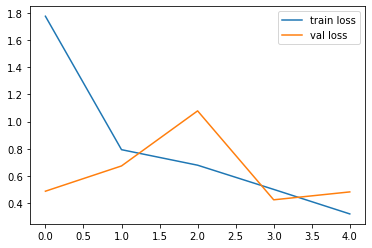

<Figure size 432x288 with 0 Axes>

In [33]:
# Plotting loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

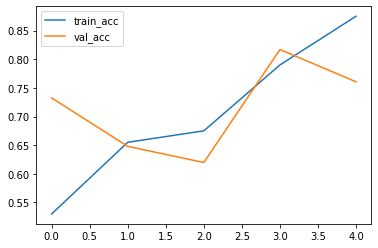

<Figure size 432x288 with 0 Axes>

In [34]:
# Plotting Accuracy
plt.plot(r.history['acc'], label='train_acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
import tensorflow as tf

from keras.models import load_model

model.save('new_model.h5')